### Author: Manasha.K

# Task 3:Exploratory Data Analysis - Retail
Perform "Exploratory Data Analytics" on the Provided dataset "SampleSuperStore".Finding Out the areas where you can work more to maximize profit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_df=pd.read_csv("SampleSuperstore.csv")

In [3]:
sample_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
sample_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
sample_df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [6]:
sample_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
sample_df.shape

(9994, 13)

In [9]:
sample_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
corr=sample_df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Heat Map

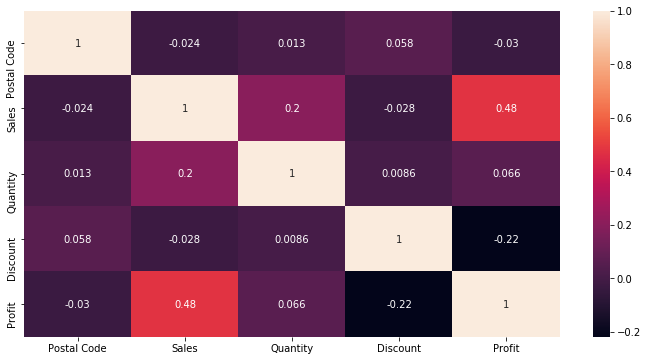

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

### Category-wise Pair Plot

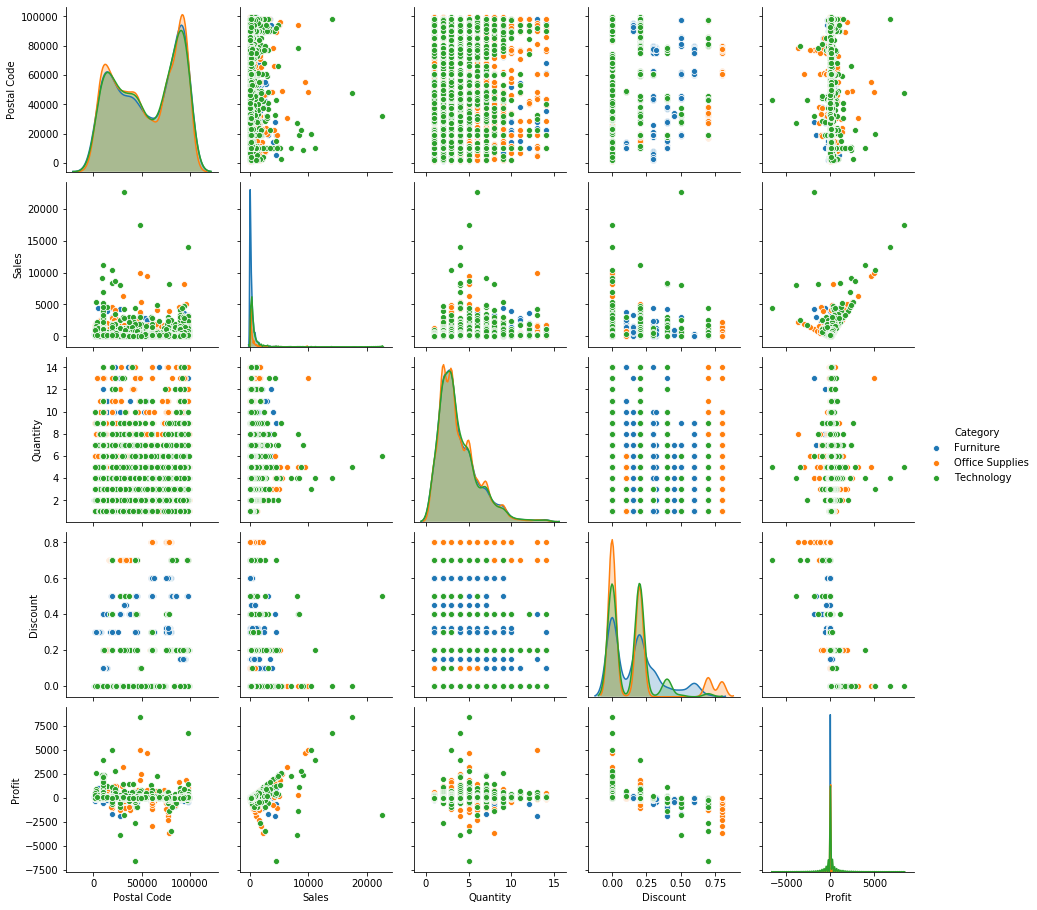

In [12]:
sns.pairplot(sample_df,hue='Category')

In [13]:
sample_df.columns.unique()

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Most sold Category

In [14]:
sample_df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

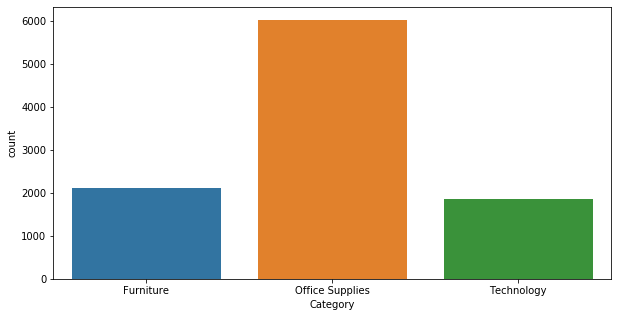

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(sample_df["Category"])
plt.show()

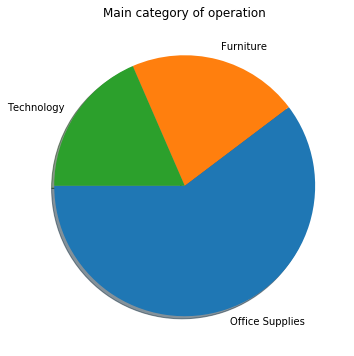

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [16]:
plt.figure(figsize=(12,6))
plt.pie(sample_df['Category'].value_counts(), labels=sample_df['Category'].value_counts().index, startangle=180, radius=1,shadow=True)
plt.title('Main category of operation')
plt.show()
print (sample_df['Category'].value_counts())

### Most sold Sub-Category Item

In [17]:
sample_df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

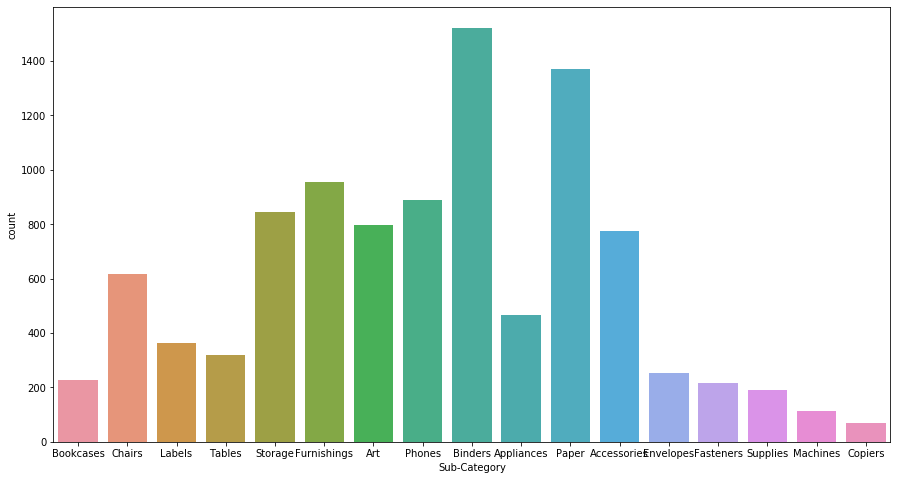

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(sample_df["Sub-Category"])
plt.show()

### Widely used Shipping Mode

In [19]:
sample_df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

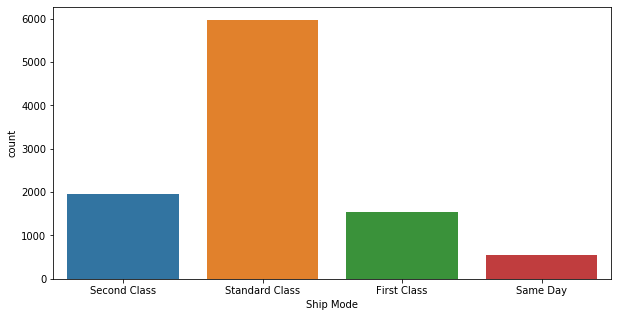

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(sample_df["Ship Mode"])
plt.show()

### Which Segment ordered most of the time

In [21]:
sample_df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

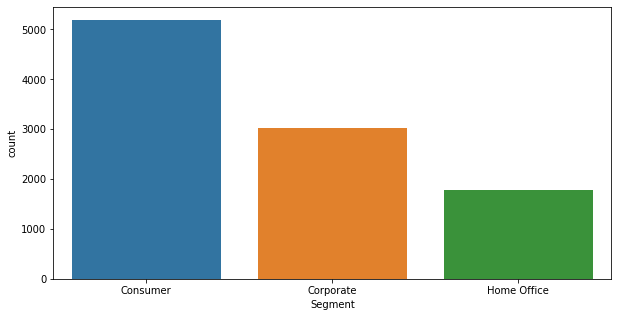

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(sample_df["Segment"])
plt.show()

### Which City ordered most of the time

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Milwaukee         45
Fairfield         45
Lawrence          44
Denver            44
Baltimore         43
San Jose          42
Cleveland         42
Pasadena          42
Fayetteville      41
Salem             40
Atlanta           39
Austin            39
Franklin          37
Wilmington        36
Huntsville        36
Tampa             36
Decatur           35
Toledo            32
Tucson       

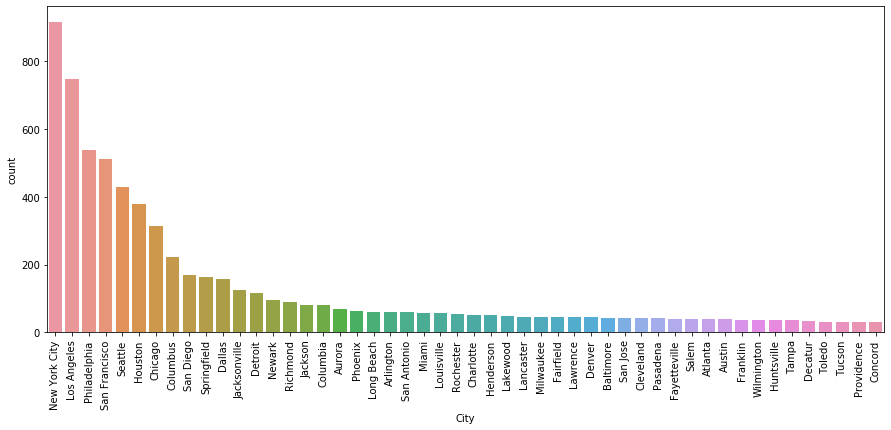

In [23]:
print(sample_df["City"].value_counts().head(50))
plt.figure(figsize=(15,6))
sns.countplot(x=sample_df['City'], order=(sample_df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

### Which Region ordered most of the time

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


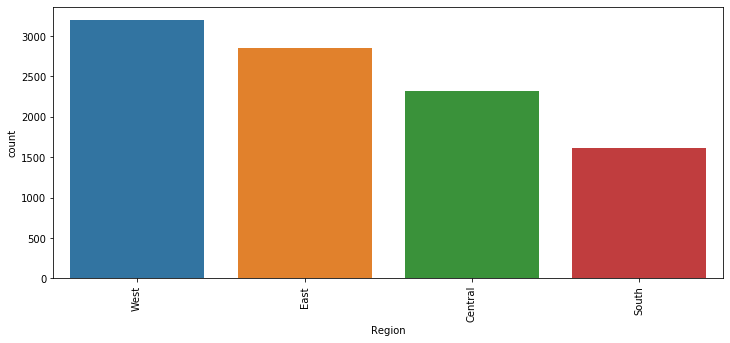

In [24]:
print(sample_df['Region'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(x=sample_df['Region'], order=(sample_df['Region'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

### Which State ordered most of the time

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

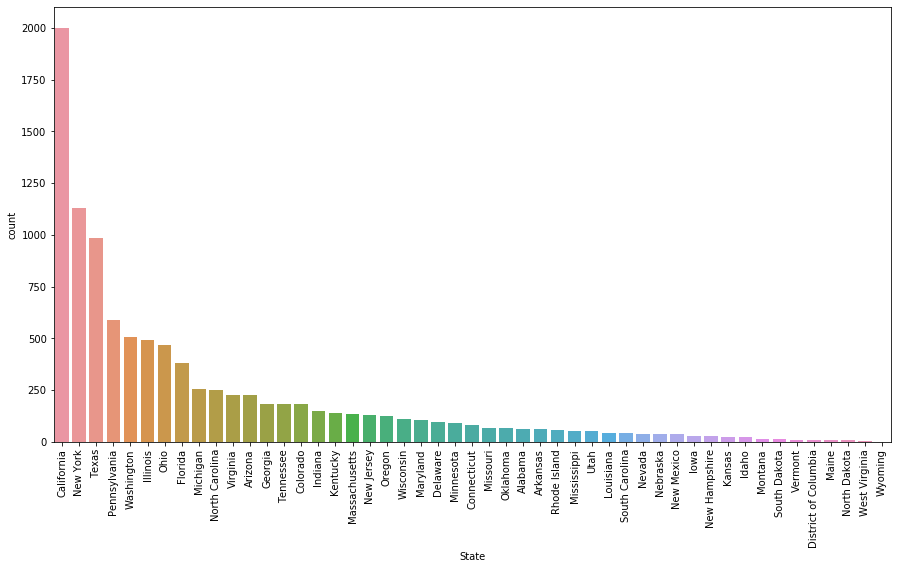

In [25]:
print(sample_df['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=sample_df['State'],order=(sample_df['State'].value_counts()).index)
plt.xticks(rotation=90)
plt.show()

<Figure size 720x432 with 0 Axes>

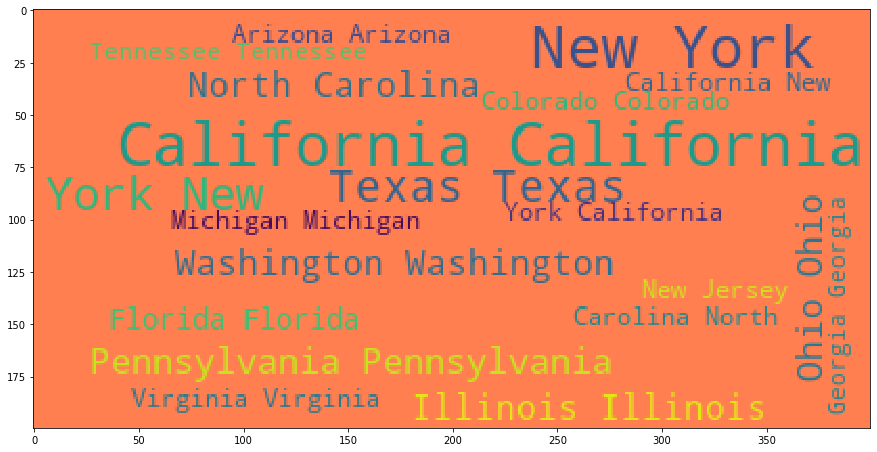

In [26]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in sample_df.State)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=20, background_color="coral").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud)

plt.show()

### Sales of each Subcategory Items under each category

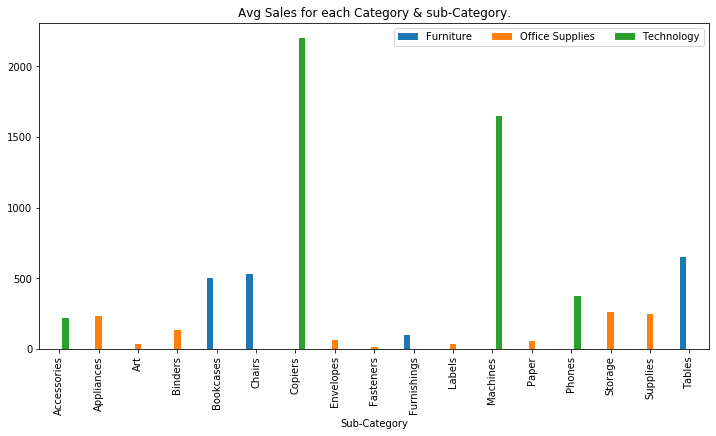

In [27]:
avg_sl=sample_df.groupby(['Sub-Category','Category'])['Sales'].mean().unstack()
plt.rcParams["figure.figsize"] = (12,6)
avg_sl.plot(kind='bar')
plt.title('Avg Sales for each Category & sub-Category.')
plt.legend(loc='upper right',ncol=4)
plt.show()

### Profit /loss and Sales of each Category Item

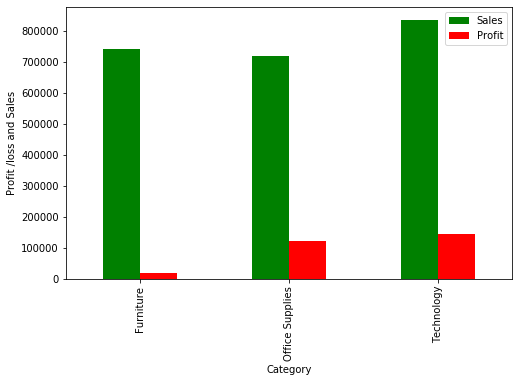

In [28]:
sample_df.groupby("Category")[[ 'Sales','Profit']].sum().plot.bar(color = ["green","red"],figsize= (8,5))
plt.ylabel("Profit /loss and Sales")
plt.show()

### Profit /loss and Sales in each State

                            Sales      Profit
State                                        
California            457687.6315  76381.3871
New York              310876.2710  74038.5486
Texas                 170188.0458 -25729.3563
Washington            138641.2700  33402.6517
Pennsylvania          116511.9140 -15559.9603
Florida                89473.7080  -3399.3017
Illinois               80166.1010 -12607.8870
Ohio                   78258.1360 -16971.3766
Michigan               76269.6140  24463.1876
Virginia               70636.7200  18597.9504
North Carolina         55603.1640  -7490.9122
Indiana                53555.3600  18382.9363
Georgia                49095.8400  16250.0433
Kentucky               36591.7500  11199.6966
New Jersey             35764.3120   9772.9138
Arizona                35282.0010  -3427.9246
Wisconsin              32114.6100   8401.8004
Colorado               32108.1180  -6527.8579
Tennessee              30661.8730  -5341.6936
Minnesota              29863.1500 

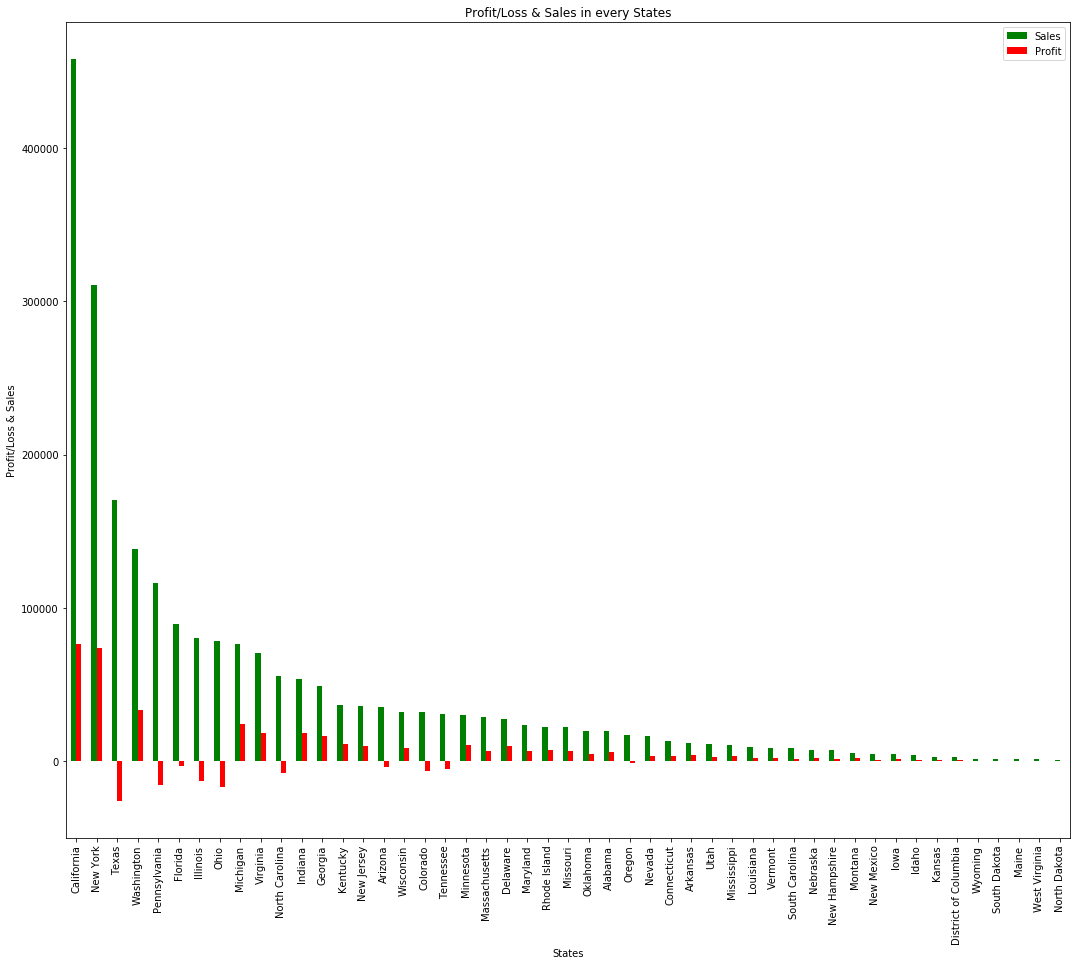

In [29]:
# Visualising sales and profit against 
pro_los_states=sample_df.groupby('State').agg({'Sales':'sum','Profit':'sum'}).sort_values(by = "Sales", ascending = False)
print(pro_los_states)
pro_los_states.plot.bar(color = ["green", "red"],figsize= (18,15))
plt.title("Profit/Loss & Sales in every States")
plt.xlabel("States")
plt.ylabel("Profit/Loss & Sales")
plt.show()

### Profit /loss and Sales in each City

                       Sales      Profit
City                                    
New York City    256368.1610  62036.9837
Los Angeles      175851.3410  30440.7579
Seattle          119540.7420  29156.0967
San Francisco    112669.0920  17507.3854
Philadelphia     109077.0130 -13837.7674
Houston           64504.7604 -10153.5485
Chicago           48539.5410  -6654.5688
San Diego         47521.0290   6377.1960
Jacksonville      44713.1830  -2323.8350
Springfield       43054.3420   6200.6974
Detroit           42446.9440  13181.7908
Columbus          38706.2430   5897.1013
Newark            28576.1190   5793.7588
Columbia          25283.3240   5606.1167
Lafayette         25036.2000  10018.3876
Jackson           24963.8580   7581.6828
San Antonio       21843.5280  -7299.0502
Burlington        21668.0820  -3622.8772
Arlington         20214.5320   4169.6969
Dallas            20131.9322  -2846.5257
Lakewood          18192.0470   3234.0278
Richmond          18137.9300   5567.2486
Henderson       

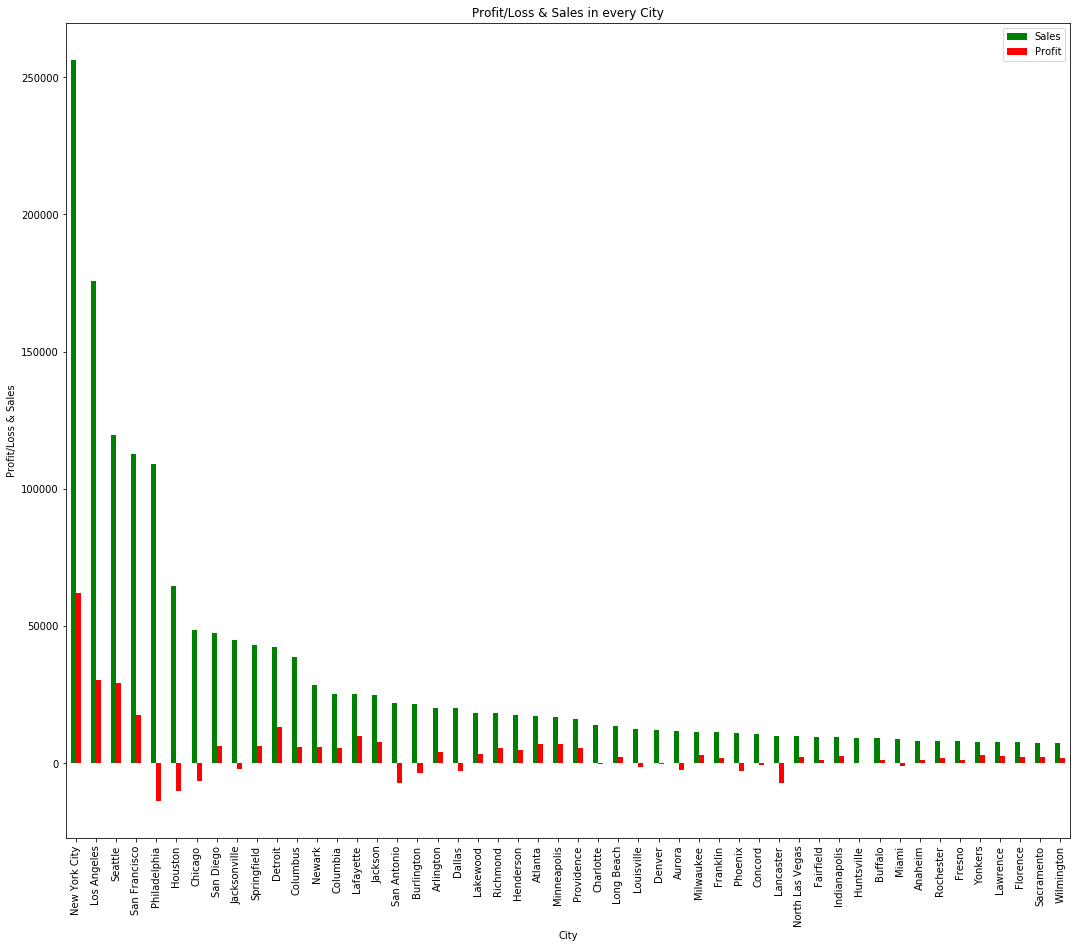

In [30]:
# Visualising sales and profit against 
pro_los_city=sample_df.groupby('City').agg({'Sales':'sum','Profit':'sum'}).sort_values(by = "Sales", ascending = False).head(50)
print(pro_los_city)
pro_los_city.plot.bar(color = ["green", "red"],figsize= (18,15))
plt.title("Profit/Loss & Sales in every City")
plt.xlabel("City")
plt.ylabel("Profit/Loss & Sales")
plt.show()

### Profit/Loss & Sales for each Sub-Category

                    Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203412.7330  30221.7633
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Paper          78479.2060  34053.5693
Supplies       46673.5380  -1189.0995
Art            27118.7920   6527.7870
Envelopes      16476.4020   6964.1767
Labels         12486.3120   5546.2540
Fasteners       3024.2800    949.5182


Text(0, 0.5, 'Profit/Loss & Sales')

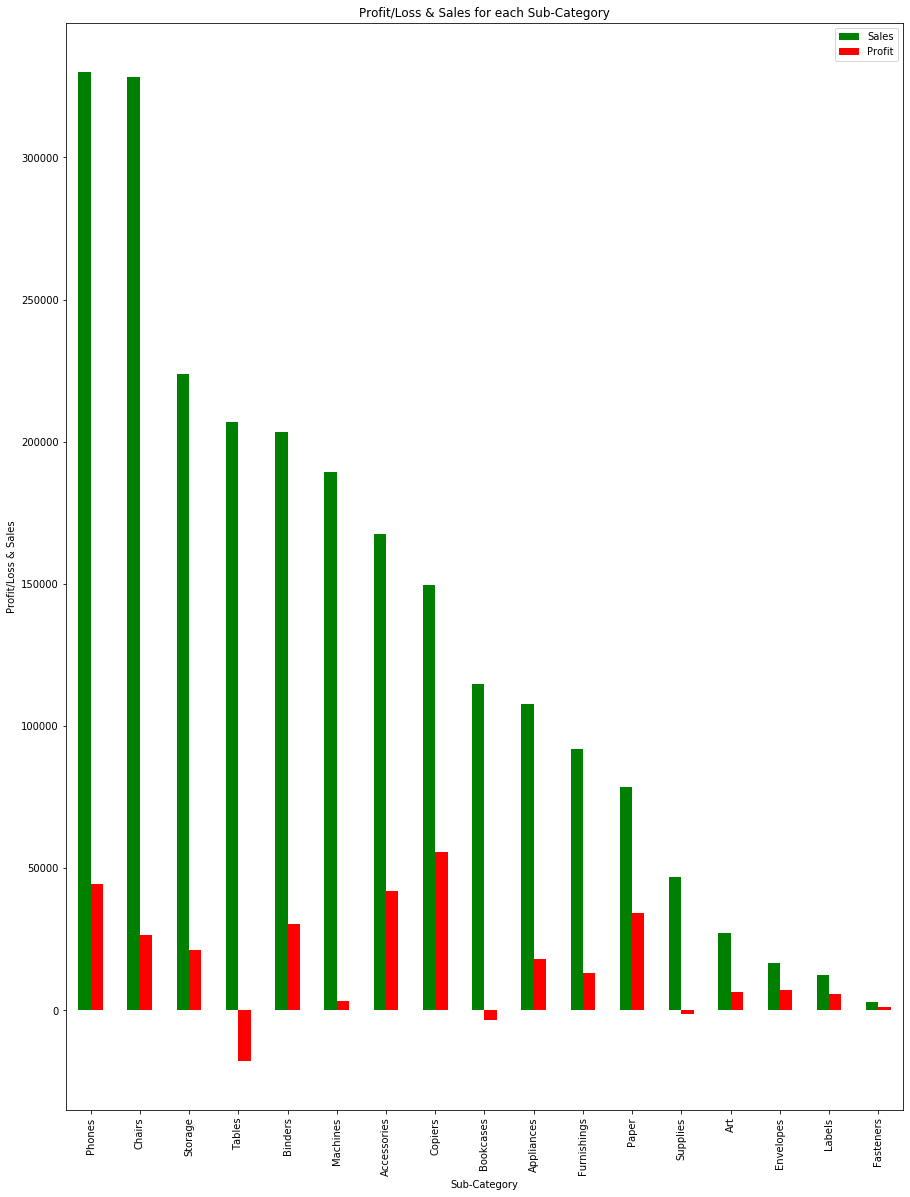

In [31]:
pro_los_subcat=sample_df.groupby('Sub-Category').agg({'Sales':'sum','Profit':'sum'}).sort_values(by = "Sales", ascending = False)
print(pro_los_subcat)
pro_los_subcat.plot.bar(color = ["green", "red"],figsize= (15,20))
plt.title("Profit/Loss & Sales for each Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit/Loss & Sales")

### Profit/Loss & Sales for each Region

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


Text(0, 0.5, 'Profit/Loss & Sales')

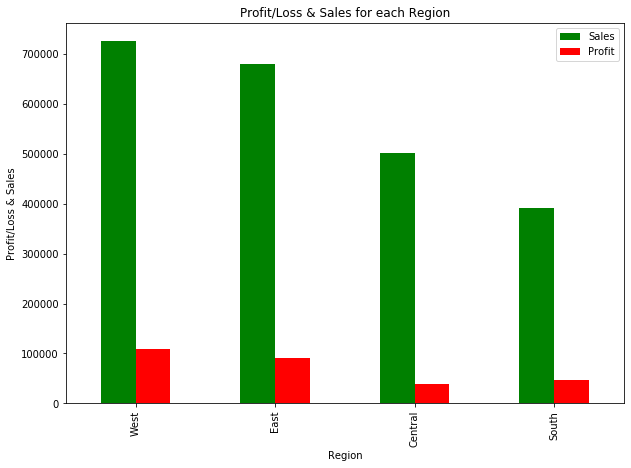

In [32]:
pro_los_region=sample_df.groupby('Region').agg({'Sales':'sum','Profit':'sum'}).sort_values(by = "Sales", ascending = False)
print(pro_los_region)
pro_los_region.plot.bar(color = ["green", "red"],figsize= (10,7))
plt.title("Profit/Loss & Sales for each Region")
plt.xlabel("Region")
plt.ylabel("Profit/Loss & Sales")

### Profit/Loss & Sales of each Segment

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


Text(0, 0.5, 'Profit/Loss & Sales')

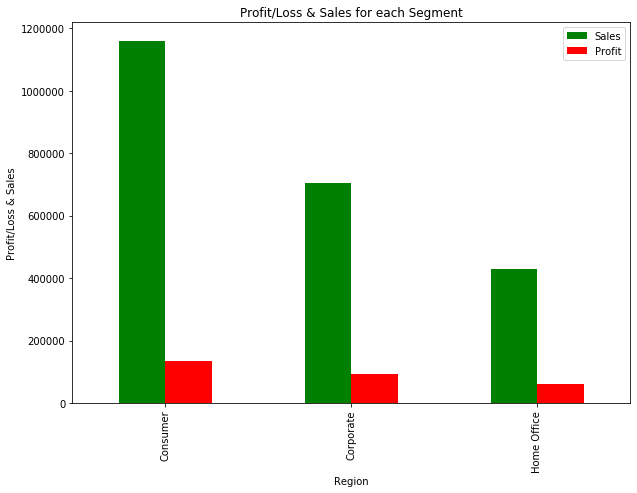

In [33]:
pro_los_Segment=sample_df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).sort_values(by = "Sales", ascending = False)
print(pro_los_Segment)
pro_los_Segment.plot.bar(color = ["green", "red"],figsize= (10,7))
plt.title("Profit/Loss & Sales for each Segment")
plt.xlabel("Region")
plt.ylabel("Profit/Loss & Sales")

                       Sales       Profit
Ship Mode                                
Standard Class  1.358216e+06  164088.7875
Second Class    4.591936e+05   57446.6354
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589


Text(0, 0.5, 'Profit/Loss & Sales')

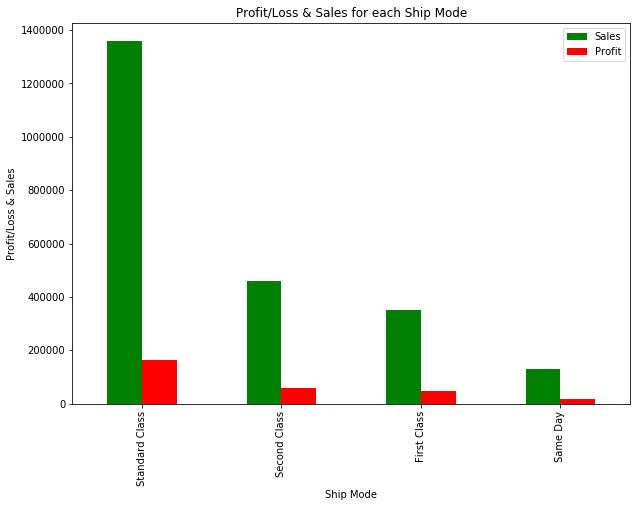

In [34]:
pro_los_ShipMode=sample_df.groupby('Ship Mode').agg({'Sales':'sum','Profit':'sum'}).sort_values(by = "Sales", ascending = False)
print(pro_los_ShipMode)
pro_los_ShipMode.plot.bar(color = ["green", "red"],figsize= (10,7))
plt.title("Profit/Loss & Sales for each Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit/Loss & Sales")

# Inferences
To maximize profit we need to focus on these factors:

          State: Texas,Ohio,Pennsylvania & Illinois(maximum Sale in this state)
          
          City: Philadelphia,Houston,San Antonio & Chicago,(maximum Sale in this City)

          Ship Mode: First Class & Same Day

          Segment:Home & Office

          Region: Central & South

          Category:Furniture

          Sub Category:Tables & Bookcases